# PART 01 :BASIC EXPLORATION 

In [57]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
import glob
import os
import zipfile

zip_files = glob.glob('/content/drive/My Drive/Colab Notebooks/*.zip')

for zip_filename in zip_files:
    dir_name = os.path.splitext(zip_filename)[0]
    if not os.path.exists(dir_name):
        os.mkdir(dir_name)
        zip_handler = zipfile.ZipFile(zip_filename, "r")
        zip_handler.extractall(dir_name)
    else:
        print("you have already  extracted",dir_name)

you have already  extracted /content/drive/My Drive/Colab Notebooks/train
you have already  extracted /content/drive/My Drive/Colab Notebooks/test


In [59]:
#READ DATA 
#!cp "/content/drive/My Drive/Colab Notebooks/train" -r "/content"
#use this 
%rm -rf /content/train
!unzip "/content/drive/My Drive/Colab Notebooks/train.zip" -d "/content/train"
#%rm -rf /content/Black-grass

Archive:  /content/drive/My Drive/Colab Notebooks/train.zip
  inflating: /content/train/Black-grass/0050f38b3.png  
  inflating: /content/train/Black-grass/0183fdf68.png  
  inflating: /content/train/Black-grass/0260cffa8.png  
  inflating: /content/train/Black-grass/05eedce4d.png  
  inflating: /content/train/Black-grass/075d004bc.png  
  inflating: /content/train/Black-grass/078eae073.png  
  inflating: /content/train/Black-grass/082314602.png  
  inflating: /content/train/Black-grass/0ace21089.png  
  inflating: /content/train/Black-grass/0b228a6b8.png  
  inflating: /content/train/Black-grass/0b3e7a7a9.png  
  inflating: /content/train/Black-grass/0bb75ded8.png  
  inflating: /content/train/Black-grass/0be707615.png  
  inflating: /content/train/Black-grass/0c67c3fc3.png  
  inflating: /content/train/Black-grass/0d1a9985f.png  
  inflating: /content/train/Black-grass/0d28c429b.png  
  inflating: /content/train/Black-grass/0d4f74f4a.png  
  inflating: /content/train/Black-grass/0dad

In [60]:
import glob
import cv2
import os
import numpy as np
from natsort import natsorted

from mpl_toolkits.axes_grid1 import ImageGrid
import matplotlib.pyplot as plt
%matplotlib inline

In [61]:
paths = glob.glob("/content/drive/My Drive/Colab Notebooks/train/*")
label_names = [os.path.split(x)[-1] for x in paths]

print("Total labels: {}".format(len(label_names)))
print("Labels: {}".format(label_names))

Total labels: 12
Labels: ['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet']


#TAKE SAMPLE FROM EACH CLASS

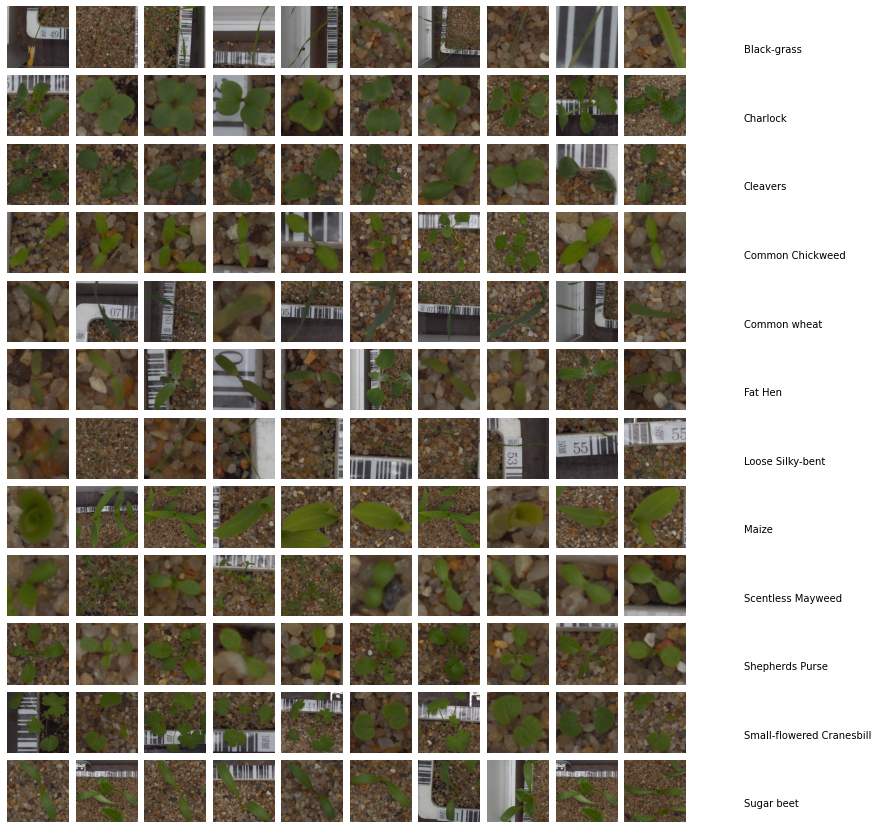

In [62]:

fig = plt.figure(1, (20, 15))
grid = ImageGrid(fig, 111, nrows_ncols=(12, 10), axes_pad=0.1)

n_img_class = []
counter = 0
for idx, label in enumerate(label_names):
    paths = glob.glob(os.path.join("/content/train", label, "*.png"))
    n_img_class.append([label, len(paths)])
    perm = np.random.choice(len(paths), size=10)
    
    title = True
    for ii in perm:
        ax = grid[counter]
        if title:
            ax.text(1800, 105, label, verticalalignment="center")
            title = False
        img = cv2.imread(paths[ii])
        img = cv2.resize(img, (150, 150))
        ax.axis("off")
        ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        counter += 1
        
plt.show()

In [63]:
# CHECK DATA FROM EACH CLASS 
total = 0
for name, value in n_img_class:
    print("{}\t{}".format(value, name))
    total += value
    
print("\nTotal samples: {}".format(total))

263	Black-grass
390	Charlock
287	Cleavers
611	Common Chickweed
221	Common wheat
475	Fat Hen
654	Loose Silky-bent
221	Maize
516	Scentless Mayweed
231	Shepherds Purse
496	Small-flowered Cranesbill
385	Sugar beet

Total samples: 4750


# PART 02 

In [64]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
%matplotlib inline
IMG_DIM = (150, 150)

In [65]:
train_files = glob.glob("/content/train/*/*")
#train_files =paths
#IMAGES 
#EXTRACT IMAGE FROM PATH
train_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in train_files]



In [66]:
#CONVERT IAGE TO ARRAY 
train_imgs = np.array(train_imgs)


In [67]:
#SCALE THE IMAGE AFTER CONVERTING INTO FLLOAT
train_imgs_scaled = train_imgs.astype('float32')
#train_imgs_scaled /= 255

In [68]:
len(train_files)

4750

In [69]:
import pandas as pd 
#LABELS :
#ENCODE LABEL :
# encode text category labels
train_labels = [x.split("/")[-2] for x in train_files]
train_labels_enc =pd.get_dummies(train_labels)
#train_labels_enc=train_labels

In [70]:
print(train_files[:10])
print(train_imgs_scaled)
print(train_labels[:10])
print(train_labels_enc[:10])


['/content/train/Loose Silky-bent/d4d65f637.png', '/content/train/Loose Silky-bent/178b92275.png', '/content/train/Loose Silky-bent/c30c4c58e.png', '/content/train/Loose Silky-bent/397583358.png', '/content/train/Loose Silky-bent/15fa7044b.png', '/content/train/Loose Silky-bent/7dafa389c.png', '/content/train/Loose Silky-bent/1f7a21bce.png', '/content/train/Loose Silky-bent/224274f93.png', '/content/train/Loose Silky-bent/5012867e0.png', '/content/train/Loose Silky-bent/378507a71.png']
[[[[112.  99.  74.]
   [107.  88.  65.]
   [110.  92.  72.]
   ...
   [116.  95.  78.]
   [103.  86.  70.]
   [ 61.  41.  28.]]

  [[ 98.  84.  65.]
   [112.  97.  75.]
   [111.  92.  73.]
   ...
   [103.  88.  67.]
   [114.  98.  82.]
   [ 84.  67.  51.]]

  [[ 99.  88.  71.]
   [100.  86.  67.]
   [ 85.  71.  60.]
   ...
   [ 96.  81.  61.]
   [111. 100.  81.]
   [ 68.  48.  29.]]

  ...

  [[ 92.  52.  34.]
   [ 97.  54.  42.]
   [ 90.  53.  40.]
   ...
   [ 89.  75.  65.]
   [ 75.  59.  47.]
   [ 89.

In [71]:
from sklearn.model_selection import train_test_split
X =train_imgs_scaled
y=train_labels_enc
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.3, random_state=4750)
#Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=250, random_state=4750)


print("All shapes")
print(Xtr.shape)
print(Xte.shape)
print(ytr.shape)
print(yte.shape)

All shapes
(3325, 150, 150, 3)
(1425, 150, 150, 3)
(3325, 12)
(1425, 12)


In [72]:
#VGG16 with augmentation 
train_imgs=Xtr
validation_imgs=Xte
train_labels_enc=ytr
validation_labels_enc=yte

In [73]:
BATCH_SIZE =32
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=50,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(train_imgs, train_labels_enc, batch_size=BATCH_SIZE)
val_generator = val_datagen.flow(validation_imgs, validation_labels_enc, batch_size=BATCH_SIZE)



In [74]:
import keras
input_shape = (150, 150, 3)
from keras.applications import vgg16
from keras.models import Model
#BYdefault vgg 16 trained on 224 X 224 if we want to provide separate size then provide input_shape
vgg = vgg16.VGG16(include_top=False, weights='imagenet', input_shape=input_shape)

output = vgg.layers[-1].output
output = keras.layers.Flatten()(output)

vgg_model = Model(vgg.input, output)
vgg_model.trainable = False

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

vgg_model.summary()



Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)      

In [75]:
import pandas as pd
pd.set_option('max_colwidth', -1)

layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


,Layer Type,Layer Name,Layer Trainable
0,<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7fefa2272208>,input_3,False
1,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fef9f0e17b8>,block1_conv1,False
2,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fef9f0f8160>,block1_conv2,False
3,<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fef9f0f8cf8>,block1_pool,False
4,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fef9f07f5c0>,block2_conv1,False
5,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fef9f07f390>,block2_conv2,False
6,<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fef9f08f2e8>,block2_pool,False
7,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fef9f08f3c8>,block3_conv1,False
8,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fef9f0b3eb8>,block3_conv2,False
9,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fef9f0b39b0>,block3_conv3,False


In [76]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers

model = Sequential()
model.add(vgg_model)
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(12, activation='softmax'))

opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
functional_3 (Functional)    (None, 8192)              14714688  
_________________________________________________________________
dense_12 (Dense)             (None, 512)               4194816   
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 12)                6156      
Total params: 19,178,316
Trainable params: 4,463,628
Non-trainable params: 14,714,688
__________________________________

In [77]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [78]:
import keras
print(keras.__version__)

2.4.3


In [79]:
len(train_imgs)//20


166

In [83]:
history = model.fit(train_generator, steps_per_epoch=len(train_imgs)//BATCH_SIZE, epochs=30,
                              validation_data=val_generator, validation_steps=len(validation_imgs)//BATCH_SIZE, verbose=1)


Epoch 1/30
103/103 [==============================] - 20s 193ms/step - loss: 1.9865 - accuracy: 0.3268 - val_loss: 1.8295 - val_accuracy: 0.4077
Epoch 2/30
103/103 [==============================] - 20s 192ms/step - loss: 1.9338 - accuracy: 0.3362 - val_loss: 1.7700 - val_accuracy: 0.4205
Epoch 3/30
103/103 [==============================] - 20s 190ms/step - loss: 1.8893 - accuracy: 0.3602 - val_loss: 1.7166 - val_accuracy: 0.4482
Epoch 4/30
103/103 [==============================] - 20s 191ms/step - loss: 1.8465 - accuracy: 0.3714 - val_loss: 1.6670 - val_accuracy: 0.4517
Epoch 5/30
103/103 [==============================] - 20s 193ms/step - loss: 1.8137 - accuracy: 0.3790 - val_loss: 1.6355 - val_accuracy: 0.4666
Epoch 6/30
103/103 [==============================] - 20s 192ms/step - loss: 1.7886 - accuracy: 0.3808 - val_loss: 1.6033 - val_accuracy: 0.4702
Epoch 7/30
103/103 [==============================] - 20s 191ms/step - loss: 1.7455 - accuracy: 0.4033 - val_loss: 1.5730 - val_ac

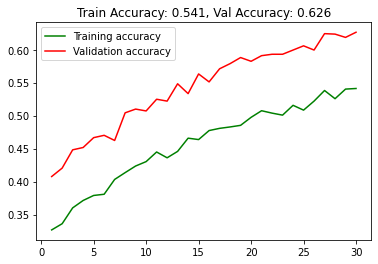

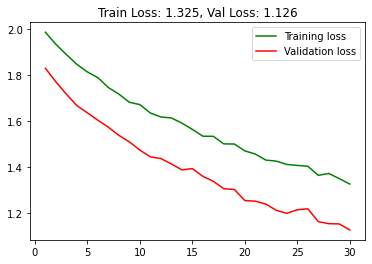

In [84]:

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Train Accuracy: %.3f, Val Accuracy: %.3f' % (acc[-1], val_acc[-1]), fontsize=12)
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Train Loss: %.3f, Val Loss: %.3f' % (loss[-1], val_loss[-1]), fontsize=12)
plt.legend()

plt.show()

In [82]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])